In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(651)

# Test and Training Data Sets

In [2]:
#Establish Training Set
ar_train_x = np.array([[0.90, 0.87], 
              [1.31, 0.75], 
              [2.48, 1.14], 
              [0.41, 1.87], 
              [2.45, 0.52], 
              [2.54, 2.97], 
              [0.07, 0.09],
              [1.32, 1.96],
              [0.94, 0.34],
              [1.75, 2.21],
             ])
#Training Set Target values
ar_train_y = np.array([1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0])

#Establish Test Set
ar_test_x = np.array([[1.81, 1.02], 
              [2.36, 1.60], 
              [2.17, 2.08], 
              [2.85, 2.91], 
              [1.05, 1.93], 
              [2.32, 1.73], 
              [1.86, 1.31],
              [1.45, 2.19],
              [0.28, 0.71],
              [2.49, 1.52],
             ])

#Test Set Target Values
ar_test_y = np.array([0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0])

# Perceptron Class

In [3]:
#Create perceptron class
class Perceptron:
    
    #initialize perceptron class
    def __init__(self, weights, bias):
        self.weights = weights
        self.delta_weights = np.zeros_like(weights)
        self.bias = bias
        self.delta_bias = 0
        self.activity = 0
        self.activation = 0
        self.delta = 0
    
    #Calculate the activity value
    def calc_activity(self, inputs):
        self.activity = np.dot(inputs, self.weights) + self.bias
        #print("activity: ", self.activity)
    
    #Calculate the activation function given the activity value using sigmoid function
    def calc_activation(self, activity):
        self.activation = 1/(1+np.exp(-1*self.activity))
        #print("activation: ", self.activation)
    
    #Find the change needed in weights and bias
    def set_delta_weights(self, inputs, eta, target):
        self.delta = self.activation*(1-self.activation)*(target - self.activation)
        for i in range(len(inputs)):
            self.delta_weights[i] = inputs[i] * self.delta * eta
        self.delta_bias =  self.delta * eta
        #print("Bias: ", self.bias, " Delta: ", self.delta, " Eta: ", eta, " Delta Bias: ", self.delta_bias)
    
    #update weights and bias
    def update_weights(self):
        #print("Weights: ", self.weights)
        #print(self.delta_weights)
        #print("Bias: ", self.bias)
        #print(self.delta_bias)
        self.weights += self.delta_weights
        self.bias += self.delta_bias
        #print("Updated bias: ", self.bias)
    
    #Call necessary functions to update perceptron using perceptron delta function process
    def perceptron_delta(self, target, inputs):
        self.target = target
        self.calc_activity(inputs)
        self.calc_activation(self.activity)
        self.set_delta_weights(inputs, eta, target)
        self.update_weights()

# Initialize Single Layer Perceptron and Find Best Weights/Eta

In [4]:
#Define weights, eta values, iterations, and bias

#Randomized weights between -5 and 5.
weight_vector = [[random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)]]
eta_values = [[0.1], [0.5], [1.0]]
iterations = 30
bias = 0

#Variables to capture best model
best_weight = 0
best_eta = 0
lowest_E = float('inf')

#for each set of weights
for g in range(0, len(weight_vector)):
    
    #for each eta value
    for h in range(0, len(eta_values)):
        
        #set eta
        eta = eta_values[h][0]
        
        #Create a Perceptron object
        Percep = Perceptron(weight_vector[g], bias)
        
        #train the network for specified number of iterations
        for i in range(0,iterations):
              
            #for every input pair
            for j in range (0, len(ar_train_x)):
                #Update the perceptron weights and bias based on the training output value
                Percep.perceptron_delta(ar_train_y[j], ar_train_x[j])
        
        #Intialize parameter to track error of trained perceptron
        total_error = 0
        
        #Calculate error for each I/O pair of training set on trained perceptron
        for k in range(0, len(ar_train_x)):
            Percep.calc_activation(Percep.calc_activity(ar_train_x[k]))
            total_error = total_error + (0.5)*(ar_train_y[j]-Percep.activation)**2
        
        #if the error is lower than lowest error calculated so far, capture error value, weights, and eta.
        if(total_error < lowest_E):
            lowest_E=total_error
            best_weights = weight_vector[g]
            best_eta = eta

print("Best Weight: ", best_weights, " Best eta: ", best_eta, "Lowest E: ", lowest_E, ", when averaged is", lowest_E/10)

Best Weight:  [-2.5199655509464582, -2.118051963544918]  Best eta:  0.1 Lowest E:  0.18053261180523342 , when averaged is 0.01805326118052334


# Initialize Single-Layer Perceptron with Best Weights/Eta

In [5]:
#Set weights and eta to best model
eta = best_eta
weight_vector = best_weights

## Retrain perceptron using Method 1 (30 iters, sequential I/O pairs)

In [6]:
#train perceptron with best model weights and eta
Percep = Perceptron(best_weights, bias)
for i in range(0,iterations):            
        #for every input pair
        for j in range (0, len(ar_train_x)):
            #Update the perceptron weights and bias based on the training output value
            Percep.perceptron_delta(ar_train_y[j], ar_train_x[j])

## Using trained model, make predictions on training data

In [7]:
#With trained model, use training value predictions to find optimal threshold:
predictions = []
for j in range (0, len(ar_train_x)): 
    Percep.calc_activation(Percep.calc_activity(ar_train_x[j]))
    pred = Percep.activation
    predictions.append(pred)
    print("Predicted: ", round(pred,3), " Actual:", ar_train_y[j]) 

Predicted:  0.049  Actual: 1.0
Predicted:  0.025  Actual: 1.0
Predicted:  0.001  Actual: 0.0
Predicted:  0.021  Actual: 0.0
Predicted:  0.003  Actual: 0.0
Predicted:  0.0  Actual: 1.0
Predicted:  0.587  Actual: 1.0
Predicted:  0.002  Actual: 0.0
Predicted:  0.115  Actual: 1.0
Predicted:  0.001  Actual: 0.0


## Find optimal threshold.

In [8]:
threshold = 0.0
best_accuracy = 0
best_threshold = 0.0


thresholds = []
sensitivity_list = []
specificity_list = []
precision_list = []
accuracy_list = []

while threshold < 1.0:
    mapped_predictions = [0 if val < threshold else 1 for val in predictions]
    
    # First, calculate the number of correct predictions
    true_positives = sum([1 for a, b in zip(ar_train_y, mapped_predictions) if a == b ==1])
    false_positives = sum([1 for a, b in zip(ar_train_y, mapped_predictions) if a == 0 and b ==1])
    true_negatives = sum([1 for a, b in zip(ar_train_y, mapped_predictions) if a == b ==0])
    false_negatives = sum([1 for a, b in zip(ar_train_y, mapped_predictions) if a == 1 and b ==0])
    
    #print("TP: ", true_positives)
    #print("FP: ", false_positives)
    
    sensitivity = true_positives/(true_positives+false_negatives)
    specificity = true_negatives/(false_positives+true_negatives)
    
    
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    try:
        precision = true_positives/(true_positives+false_positives)
        precision_list.append(precision)
    except ZeroDivisionError:
        precision_list.append(0)
    correct_predictions = sum([1 for a, b in zip(ar_train_y, mapped_predictions) if a == b])
    
    # Then, calculate the accuracy as a percentage of correct predictions
    accuracy = correct_predictions / len(ar_train_y)
    accuracy_list.append(accuracy)
    thresholds.append(threshold)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        
    threshold = threshold + 0.001
    
print("Best Accuracy:", best_accuracy, " when threshold is: ", round(best_threshold,4))

Best Accuracy: 0.9  when threshold is:  0.022


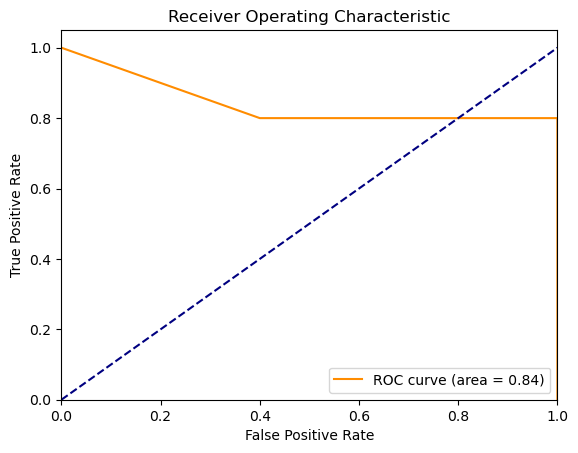

In [9]:
# Calculate the Area Under Curve (AUC)
roc_auc = np.trapz(sensitivity_list, specificity_list)

# Plot the ROC curve
plt.figure()
plt.plot(specificity_list, sensitivity_list, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

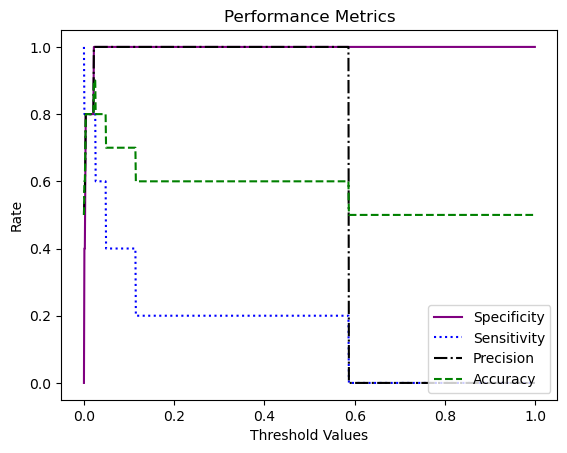

In [10]:
# Plot the ROC curve
plt.figure()
plt.plot(thresholds, specificity_list, color='purple', label='Specificity')
plt.plot(thresholds, sensitivity_list, color='blue', label='Sensitivity', linestyle='dotted')
plt.plot(thresholds, precision_list, color='black', label='Precision', linestyle='dashdot')
plt.plot(thresholds, accuracy_list, color='green', label='Accuracy', linestyle='dashed')
plt.xlabel('Threshold Values')
plt.ylabel('Rate')
plt.title('Performance Metrics')
plt.legend(loc="lower right")
plt.show()

## Apply threshold and evaluate against Test set

In [11]:
predictions = []

#With trained model, use test values to evaluate
for j in range (0, len(ar_test_x)): 
    Percep.calc_activation(Percep.calc_activity(ar_test_x[j]))
    pred = Percep.activation
    predictions.append(pred)
    #print("Predicted: ", round(pred,3), " Actual:", ar_test_y[j]) 
    
mapped_predictions = [0 if val < best_threshold else 1 for val in predictions]
correct_predictions = sum([1 for a, b in zip(ar_test_y, mapped_predictions) if a == b])
accuracy = correct_predictions / len(ar_test_y) * 100
print(accuracy)

80.0


# Multi-Layer Case

## Define layer class that will be used for a 2 layer network

In [12]:
class Layer:
    #initialize layer class
    def __init__(self, layer_weight, eta = 0,  bias = None):
        self.layer_weight = layer_weight
        self.layer_bias = bias
        self.eta = eta
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def get_layer_output_vector(self, inputs):
        self.activity = np.dot(inputs ,self.layer_weight)+self.layer_bias
        self.output_vector = 1/(1+np.exp(-self.activity))
        return self.output_vector
    
    def get_error_vector(self, desired_output):
        self.littleE_vector = desired_output - self.output_vector
        return self.littleE_vector
    
    def calc_delta_k(self, target):
        #print("Target is ", target)
        #print("Output vector is: ", self.output_vector)
        self.littleE = target - self.output_vector
        #print("Little E is ", self.littleE)
        self.bigE = 0.5*self.littleE**2
        self.delta_k = self.littleE*(1-self.output_vector)*self.output_vector
        return self.delta_k
    
    def calc_delta_j(self, delta_k, next_layer_weights):
        #print(delta_k)
        #print(next_layer_weights)
        self.delta_j = (1-self.output_vector)*self.output_vector*(delta_k*next_layer_weights).T
        return self.delta_j
    
    def calc_delta_weights (self, delta, prev_layer_input):
        #print("---DELTA WEIGHT CALC----")
        #print("Self Weights", self.layer_weight)
        #print("shape ", self.layer_weight.shape)
        #print("eta", self.eta)
        #print("delta", delta)
        #print("Prev Layer input ", prev_layer_input)
        self.delta_weights = self.layer_weight + self.eta*delta*prev_layer_input
        self.delta_bias = self.layer_bias + self.eta*delta
        return self.delta_weights, self.delta_bias
    
    def update_layer_weights(self):
        self.layer_weight = self.delta_weights
        self.layer_bias = self.delta_bias
        

# Initialize Multi-Layer Network and Find Best Weights/Eta

In [13]:
#Define weights, eta values, iterations, and bias
#weight_layer_1 = np.array([[[-1.0, -1.0], [-1.0, -1.0]], [[-0.5, -0.5], [-0.5, -0.5]], [[0.5, 0.5], [0.5, 0.5]], [[1.0, 1.0], [1.0, 1.0]]])
#weight_layer_2 = np.array([[-1.0, -1.0], [-0.5, -0.5], [0.5, 0.5], [1.0, 1.0], [-0.5, 0.5], [-1.0, 1.0]])

#Randomize set of weights
weight_layer_1 = np.array([[[random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)]], [[random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)]], [[random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)]], [[random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)]], [[random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)]], [[random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)]]])
weight_layer_2 = np.array([[random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)], [random.uniform(-5.0,5.0), random.uniform(-5.0,5.0)]])


eta_values = [[0.1], [0.5], [1.0]]
iterations = 30
bias = 0

#Variables to capture best model
best_weights1 = 0
best_weights2 = 0
best_eta = 0
lowest_E = float('inf')

#for each set of weights in layer 1
for f in range(0, len(weight_layer_1)):
    #Layer1=Layer(weight_layer_1[f].reshape(2,2), eta, bias)
    #print("Layer 1 weights: ", Layer1.layer_weight)
    
    #for each set of weights in layer 2
    for g in range (0, len(weight_layer_2)):
        
        #for each eta value in our list
        for h in range(0, len(eta_values)):
            #set eta, layer weights
            eta = eta_values[h][0]
            Layer1=Layer(weight_layer_1[f].reshape(2,2), eta, bias)
            #print("Layer 1 weights: ", Layer1.layer_weight)
            Layer2=Layer(weight_layer_2[g].reshape(2,1), eta, bias)
            #print("Layer 1 weights: ", Layer1.layer_weight)
            
            #train the network for specified number of iterations
            for i in range(0,iterations):
                total_error = 0
                #Train network for method 1:
                for j in range(0,len(ar_train_x)):
                    Layer1.get_layer_output_vector(ar_train_x[j])
                    Layer2.get_layer_output_vector(Layer1.output_vector)
                    Layer2.calc_delta_k(ar_train_y[j])
                    Layer2.calc_delta_weights(Layer2.delta_k, Layer1.output_vector.reshape(2,1))
                    Layer1.calc_delta_j(Layer2.delta_k, Layer2.layer_weight)
                    Layer1.calc_delta_weights(Layer1.delta_j, ar_train_x[j])
                    Layer1.update_layer_weights()
                    Layer2.update_layer_weights()
                    total_error = total_error + Layer2.bigE
            
            #After training the network, calculate error values for each I/O pair
            for j in range(0,len(ar_train_x)):
                Layer1.get_layer_output_vector(ar_train_x[j])
                Layer2.get_layer_output_vector(Layer1.output_vector)
                Layer2.calc_delta_k(ar_train_y[j])
                total_error = total_error + Layer2.bigE
            
            #if lowest total error, capture weights and eta
            if(total_error < lowest_E):
                lowest_E=total_error
                best_weights1 = weight_layer_1[f]
                best_weights2 = weight_layer_2[g]
                best_eta = eta

print("Best Weight for layer 1: ", best_weights1, "Best weights for layer 2:", best_weights2,  " Best eta: ", best_eta, "Lowest E: ", lowest_E, ", when averaged is ",lowest_E/10)

Best Weight for layer 1:  [[ 0.86234784 -4.57220452]
 [ 0.22134985  1.64877736]] Best weights for layer 2: [-3.32638497 -4.51490284]  Best eta:  1.0 Lowest E:  [[1.2806515]] , when averaged is  [[0.12806515]]


In [14]:
weight_layer_2


array([[-3.32638497, -4.51490284],
       [-2.1196283 , -2.00322439],
       [ 2.05615998,  4.25014488],
       [ 2.94218223,  2.46047596],
       [-3.89054207, -1.95104491],
       [ 0.27124654, -4.86482256]])

# Initialize Multi-Layer Network with Best Weights/Eta

In [15]:
#Set weights and eta to best model
eta = best_eta
weight_vector_1 = best_weights1
weight_vector_2 = best_weights2
bias = 0

Layer1=Layer(weight_vector_1.reshape(2,2), eta, bias)
Layer2=Layer(weight_vector_2.reshape(2,1), eta, bias)

## Retrain Network using Method 1 (30 iters, sequential I/O pairs)

In [16]:
#train the network with the best eta and weight values
for i in range(0,iterations):
    #Train network for method 1:
    for j in range(0,len(ar_train_x)):
        Layer1.get_layer_output_vector(ar_train_x[j])
        Layer2.get_layer_output_vector(Layer1.output_vector)
        Layer2.calc_delta_k(ar_train_y[j])
        Layer2.calc_delta_weights(Layer2.delta_k, Layer1.output_vector.reshape(2,1))
        Layer1.calc_delta_j(Layer2.delta_k, Layer2.layer_weight)
        Layer1.calc_delta_weights(Layer1.delta_j, ar_train_x[j])
        Layer1.update_layer_weights()
        Layer2.update_layer_weights()

## Using trained model, make predictions on training data

In [17]:
#With trained model, use training value predictions to find optimal threshold:
predictions = []
for j in range (0, len(ar_train_x)): 
    Layer1.get_layer_output_vector(ar_train_x[j])
    Layer2.get_layer_output_vector(Layer1.output_vector)
    pred = Layer2.output_vector
    predictions.append(pred)
    print("Predicted: ", np.round(pred,3), " Actual:", ar_train_y[j]) 

Predicted:  [[0.667]]  Actual: 1.0
Predicted:  [[0.607]]  Actual: 1.0
Predicted:  [[0.326]]  Actual: 0.0
Predicted:  [[0.053]]  Actual: 0.0
Predicted:  [[0.365]]  Actual: 0.0
Predicted:  [[0.25]]  Actual: 1.0
Predicted:  [[0.846]]  Actual: 1.0
Predicted:  [[0.182]]  Actual: 0.0
Predicted:  [[0.81]]  Actual: 1.0
Predicted:  [[0.226]]  Actual: 0.0


## Find optimal threshold.

In [18]:
threshold = 0.0
best_accuracy = 0
best_threshold = 0.0


thresholds = []
sensitivity_list = []
specificity_list = []
precision_list = []
accuracy_list = []

while threshold < 1.0:
    mapped_predictions = [0 if val < threshold else 1 for val in predictions]
    
    # First, calculate the number of correct predictions
    true_positives = sum([1 for a, b in zip(ar_train_y, mapped_predictions) if a == b ==1])
    false_positives = sum([1 for a, b in zip(ar_train_y, mapped_predictions) if a == 0 and b ==1])
    true_negatives = sum([1 for a, b in zip(ar_train_y, mapped_predictions) if a == b ==0])
    false_negatives = sum([1 for a, b in zip(ar_train_y, mapped_predictions) if a == 1 and b ==0])
    
    #print("TP: ", true_positives)
    #print("FP: ", false_positives)
    
    sensitivity = true_positives/(true_positives+false_negatives)
    specificity = true_negatives/(false_positives+true_negatives)
    
    
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    try:
        precision = true_positives/(true_positives+false_positives)
        precision_list.append(precision)
    except ZeroDivisionError:
        precision_list.append(0)
    correct_predictions = sum([1 for a, b in zip(ar_train_y, mapped_predictions) if a == b])
    
    # Then, calculate the accuracy as a percentage of correct predictions
    accuracy = correct_predictions / len(ar_train_y)
    accuracy_list.append(accuracy)
    thresholds.append(threshold)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        
    threshold = threshold + 0.001
    
print("Best Accuracy:", best_accuracy, " when threshold is: ", round(best_threshold,4))

Best Accuracy: 0.9  when threshold is:  0.365


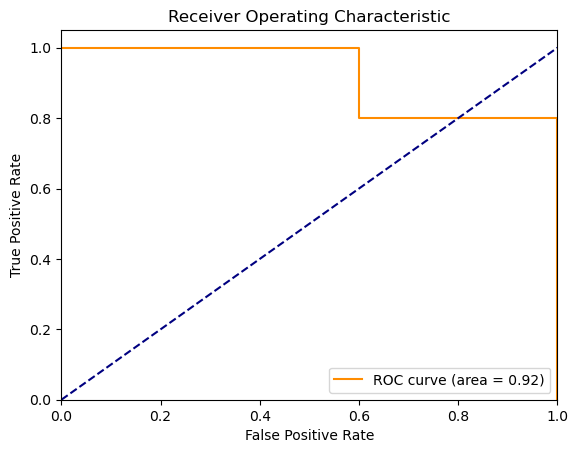

In [19]:
# Calculate the Area Under Curve (AUC)
roc_auc = np.trapz(sensitivity_list, specificity_list)

# Plot the ROC curve
plt.figure()
plt.plot(specificity_list, sensitivity_list, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

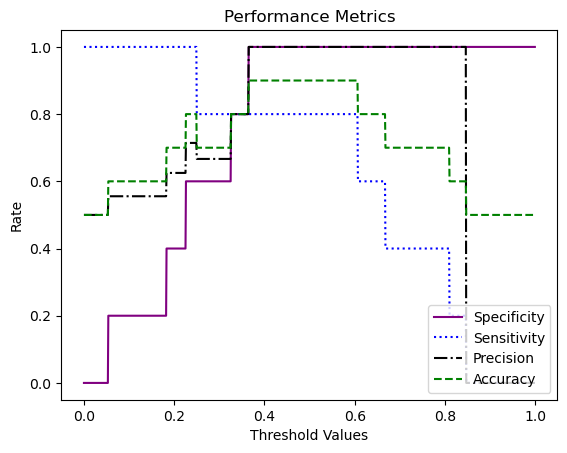

In [20]:
# Plot the ROC curve
plt.figure()
plt.plot(thresholds, specificity_list, color='purple', label='Specificity')
plt.plot(thresholds, sensitivity_list, color='blue', label='Sensitivity', linestyle='dotted')
plt.plot(thresholds, precision_list, color='black', label='Precision', linestyle='dashdot')
plt.plot(thresholds, accuracy_list, color='green', label='Accuracy', linestyle='dashed')
plt.xlabel('Threshold Values')
plt.ylabel('Rate')
plt.title('Performance Metrics')
plt.legend(loc="lower right")
plt.show()

## Apply threshold and evaluate against Test set

In [28]:
predictions = []

#With trained model, use test values to evaluate
for j in range (0, len(ar_test_x)): 
    Layer1.get_layer_output_vector(ar_test_x[j])
    Layer2.get_layer_output_vector(Layer1.output_vector)
    pred = Layer2.output_vector
    predictions.append(pred)
    print("Predicted: ", np.round(pred,3), " Actual:", ar_test_y[j])
    
mapped_predictions = [0.0 if val < best_threshold else 1.0 for val in predictions]
correct_predictions = sum([1 for a, b in zip(ar_test_y, mapped_predictions) if a == b])
accuracy = correct_predictions / len(ar_test_y) * 100
print(accuracy)

Predicted:  [[0.412]]  Actual: 0.0
Predicted:  [[0.314]]  Actual: 0.0
Predicted:  [[0.293]]  Actual: 1.0
Predicted:  [[0.281]]  Actual: 1.0
Predicted:  [[0.111]]  Actual: 0.0
Predicted:  [[0.311]]  Actual: 0.0
Predicted:  [[0.366]]  Actual: 0.0
Predicted:  [[0.145]]  Actual: 0.0
Predicted:  [[0.64]]  Actual: 1.0
Predicted:  [[0.312]]  Actual: 0.0
60.0
